In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Load churn-monetization features
df = pd.read_csv(
    "C:/Users/Abhi/Desktop/Python_Data_Analytics_Projects/content_engagement_churn_analytics/data/processed/content_retention_impact_analysis.csv"
)

df.head()

,user_id,subscription_plan,churn_flag,avg_watch_minutes,avg_sessions,engagement_volatility,avg_watch_7d,avg_watch_30d,revenue_30d,engagement_trend,engagement_score,churn_risk_score,churn_risk_segment
0,U00001,Basic,1,122.327536,4.547826,71.764339,122.122885,122.184636,14.140580,0.143272,28.766061,24.727127,High Risk
1,U00002,Basic,1,121.375000,4.601562,63.786368,121.955407,121.521901,14.363281,-0.337561,30.794558,21.580623,Low Risk
2,U00003,Basic,1,124.544828,4.583908,67.809904,123.947411,122.452469,14.261494,0.251152,30.850132,22.739532,Medium Risk
3,U00004,Free,1,128.353247,4.927273,69.014366,128.166358,127.670915,5.371558,-0.169271,32.115171,22.570291,Medium Risk
4,U00005,Basic,1,121.992167,4.738903,63.305509,121.290066,120.139129,14.542428,0.096485,31.226885,21.191112,Low Risk


In [15]:
total_users = df["user_id"].nunique()
churn_rate = df["churn_flag"].mean()

avg_revenue = df["revenue_30d"].mean()

high_risk_pct = (df["churn_risk_segment"] == "High Risk").mean()

kpi_df = pd.DataFrame({
    "Metric": [
        "Total Users",
        "Churn Rate (%)",
        "Avg 30-Day Revenue per User",
        "High Churn Risk (%)"
    ],
    "Value": [
        total_users,
        round(churn_rate * 100, 2),
        round(avg_revenue, 2),
        round(high_risk_pct * 100, 2)
    ]
})

kpi_df



,Metric,Value
0,Total Users,1200.00
1,Churn Rate (%),99.67
2,Avg 30-Day Revenue per User,11.77
3,High Churn Risk (%),33.33


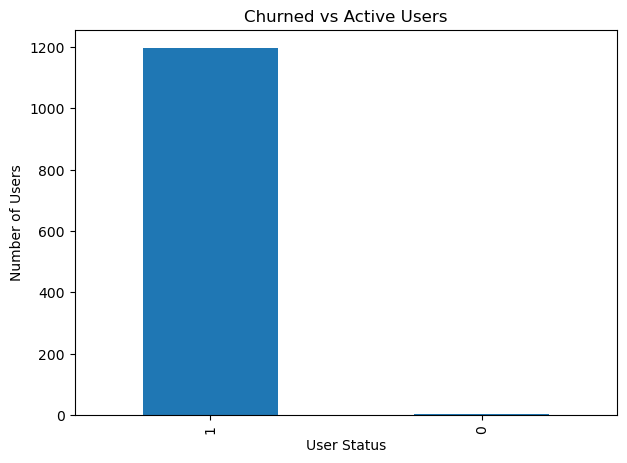

In [57]:
plt.figure(figsize=(7,5))
churn_dist = df["churn_flag"].value_counts()

churn_dist.plot(kind="bar")
plt.title("Churned vs Active Users")
plt.xlabel("User Status")
plt.ylabel("Number of Users")

plt.savefig(
    f"{"C:/Users/Abhi/Desktop/Python_Data_Analytics_Projects/content_engagement_churn_analytics/visuals"}/Churned vs Active Users.png",
    bbox_inches="tight"
)
plt.show()


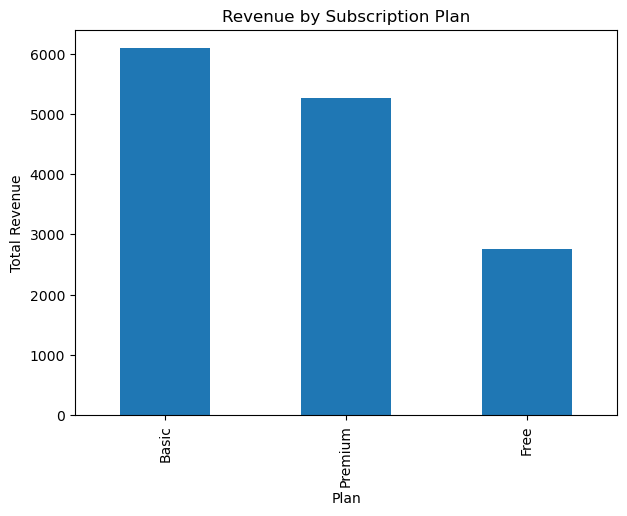

In [45]:
plt.figure(figsize=(7, 5))
revenue_plan = (
    df.groupby("subscription_plan")["revenue_30d"]
      .sum()
      .sort_values(ascending=False)
)

revenue_plan.plot(kind="bar")
plt.title("Revenue by Subscription Plan")
plt.xlabel("Plan")
plt.ylabel("Total Revenue")

plt.savefig(
    f"{"C:/Users/Abhi/Desktop/Python_Data_Analytics_Projects/content_engagement_churn_analytics/visuals"}/avg_revenue_by_plan.png",
    bbox_inches="tight"
)
plt.show()


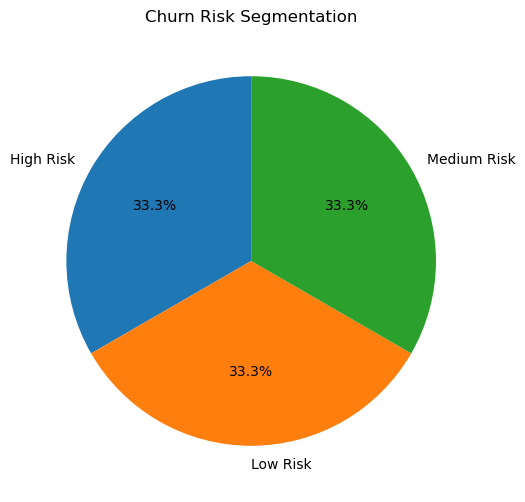

In [41]:
risk_dist = df["churn_risk_segment"].value_counts()

plt.figure(figsize=(6, 6))
risk_dist.plot(kind="pie", autopct="%1.1f%%",startangle=90)
plt.title("Churn Risk Segmentation")
plt.ylabel("")

plt.savefig(
    f"{"C:/Users/Abhi/Desktop/Python_Data_Analytics_Projects/content_engagement_churn_analytics/visuals"}/churn_risk_segmentation.png",
    bbox_inches="tight"
)
plt.show()


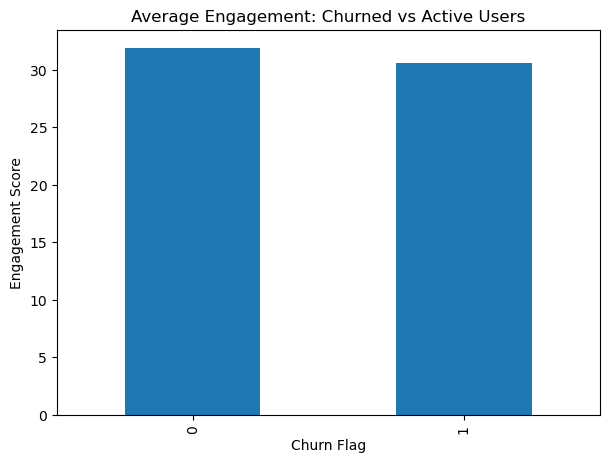

In [61]:
plt.figure(figsize=(7, 5))
engagement_churn = (
    df.groupby("churn_flag")["engagement_score"]
      .mean()
)

engagement_churn.plot(kind="bar")
plt.title("Average Engagement: Churned vs Active Users")
plt.xlabel("Churn Flag")
plt.ylabel("Engagement Score")

plt.savefig(
    f"{"C:/Users/Abhi/Desktop/Python_Data_Analytics_Projects/content_engagement_churn_analytics/visuals"}/Average_Engagement_Churned vs Active Users.png",
    bbox_inches="tight"
)
plt.show()


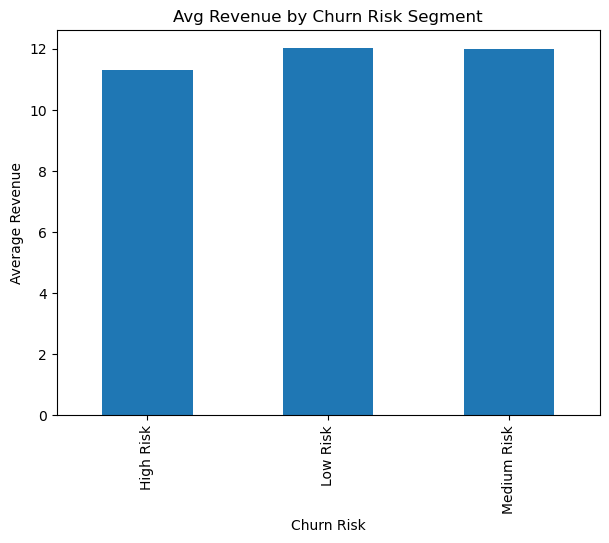

In [51]:
plt.figure(figsize=(7, 5))
monetization_risk = (
    df.groupby("churn_risk_segment")["revenue_30d"]
      .mean()
)

monetization_risk.plot(kind="bar")
plt.title("Avg Revenue by Churn Risk Segment")
plt.xlabel("Churn Risk")
plt.ylabel("Average Revenue")

plt.savefig(
    f"{"C:/Users/Abhi/Desktop/Python_Data_Analytics_Projects/content_engagement_churn_analytics/visuals"}/Avg Revenue by Churn Risk Segment.png",
    bbox_inches="tight"
)
plt.show()


In [31]:
summary = (
    df.groupby("subscription_plan")
      .agg(
          users=("user_id", "count"),
          churn_rate=("churn_flag", "mean"),
          avg_revenue=("revenue_30d", "mean"),
          avg_engagement=("engagement_score", "mean")
      )
      .reset_index()
)

summary["churn_rate"] = (summary["churn_rate"] * 100).round(2)
summary.rename(columns={"churn_rate": "churn_rate_pct"}, inplace=True)

summary


,subscription_plan,users,churn_rate_pct,avg_revenue,avg_engagement
0,Basic,431,99.77,14.146916,30.456999
1,Free,538,99.63,5.127675,30.619305
2,Premium,231,99.57,22.787306,30.633233


In [33]:
#📌 Executive Insights

#Churn is strongly driven by low engagement

#Premium users generate most revenue but still face churn risk

#High-risk users represent a clear revenue leakage

#Engagement improvement = churn reduction = revenue growth